In [1]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Time Series Week 5 - Assignment

In [146]:
# Load a time series dataset
sale_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/sales_dataset.csv' , parse_dates=['Dates'], index_col='Dates')


# Import Libraries
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose  # to split the time series into components
import statsmodels.tsa.api as smt

warnings.filterwarnings('ignore')

print(sale_data.columns)

Index(['Sales'], dtype='object')


## 1. Single Exponential Smoothing (SES)

### 1.1 Exploratory Data Analysis
**Task:** Perform exploratory data analysis (EDA) on the time series data

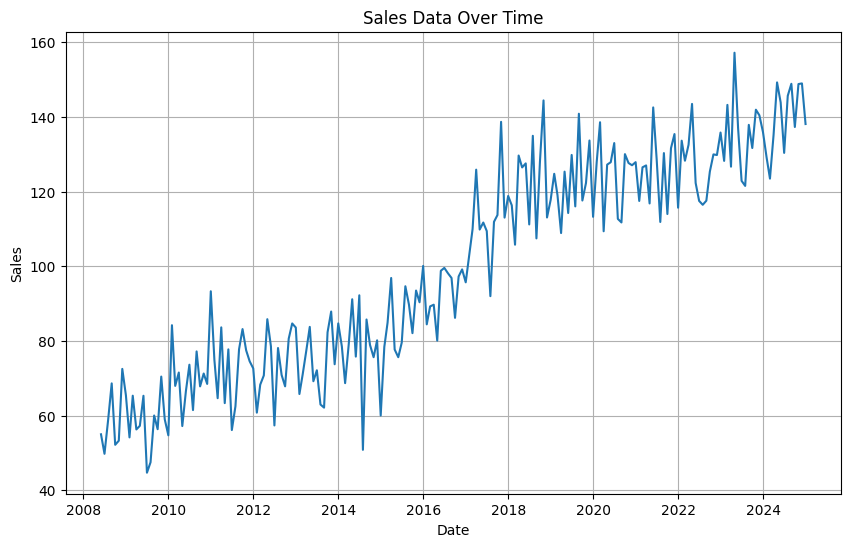

count    200.000000
mean      99.342100
std       28.959113
min       44.680000
25%       74.337500
50%       97.675000
75%      126.992500
max      157.170000
Name: Sales, dtype: float64


In [147]:
# Plot the time series data and analyze its trend, seasonality, or other patterns

# Compute and display descriptive statistics (mean, standard deviation, etc.)

plt.figure(figsize=(10, 6))
plt.plot(sale_data['Sales'])
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Calculate and display descriptive statistics
descriptive_stats = sale_data['Sales'].describe()
print(descriptive_stats)

### 1.2 Split Data into Train and Test Datasets
**Task:** Split the data into training and testing sets (e.g., 80% training and 20% testing)

In [148]:
# Split the dataset into train and test based on time, not randomly

train_size = int(len(sale_data) * 0.8)
train = sale_data.iloc[:train_size]
test = sale_data.iloc[train_size:]

# Train/Test 데이터 크기 출력
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

Train size: 160
Test size: 40


### 1.3 Build the SES Model
**Task:** Build a Simple Exponential Smoothing (SES) model using the training data

In [149]:
# Use statsmodels to build the SES model
ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2045)
y_pred = ses_model.forecast(len(test))


y_pred
# Make predictions on the test data and compute error metrics (MSE, RMSE)
# MSE 계산: (예측값 - 실제값)의 제곱의 평균
mse = np.mean((test['Sales'].values - y_pred) ** 2)

# RMSE 계산: MSE의 제곱근
rmse = np.sqrt(mse)


# MSE와 RMSE 출력
print(f"SES MSE: {mse}, RMSE: {rmse}")



SES MSE: 170.9027847412387, RMSE: 13.07297918384477


### 1.4 Plot Train, Test, and Predicted Values
**Task:** Visualize the train, test, and predicted values for SES

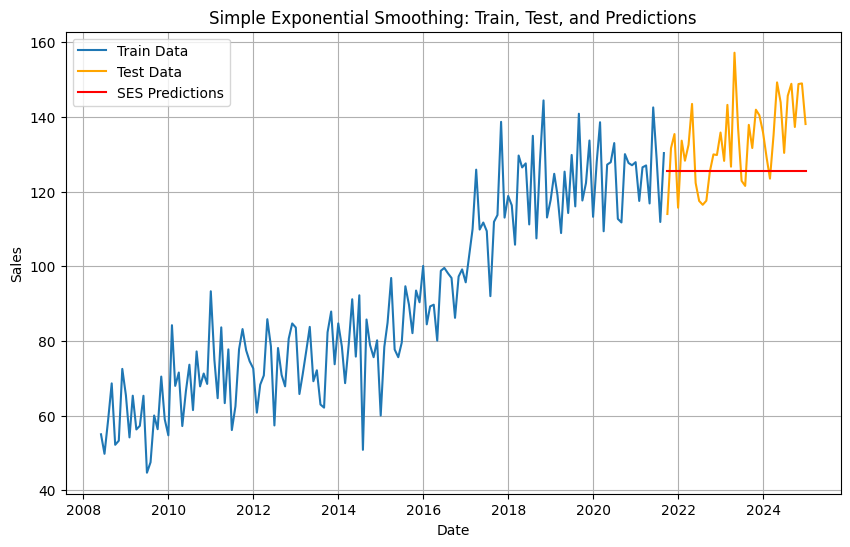

In [101]:
# Plot the training data, test data, and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data')
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, y_pred, label='SES Predictions', color='red')
plt.title('Simple Exponential Smoothing: Train, Test, and Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### 1.5 Hyperparameter Tuning and Optimizer Function
**Task:** Tune the SES model by optimizing the smoothing level (alpha)

Best alpha: 1.0, Best MSE: 118.6134825


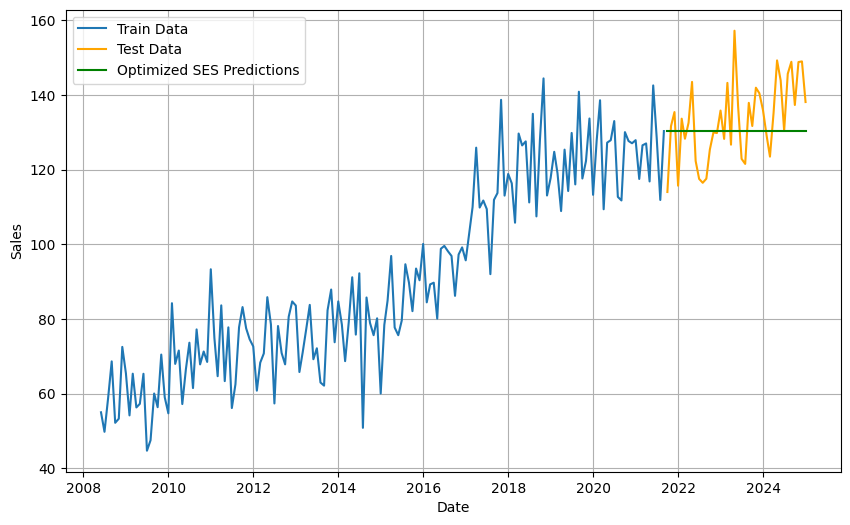

In [102]:
# Create a function to find the optimal alpha by minimizing the error (e.g., MSE)
ses_model.params
# Use the optimizer to find the best value for alpha
def ses_optimizer(train, alphas, step=len(test)):  # step for length of test set
    best_alpha = None
    best_mse = float("inf")

for alpha in np.arange(0.1, 1.1, 0.1):
    ses_model = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=alpha)
    y_pred = ses_model.forecast(len(test))
    mse = np.mean((test['Sales'] - y_pred) ** 2)

    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# 최적의 alpha 값으로 다시 모델을 학습하고 예측
ses_model_optimized = SimpleExpSmoothing(train['Sales']).fit(smoothing_level=best_alpha)
y_pred_optimized = ses_model_optimized.forecast(len(test))

# 최적의 alpha와 MSE 출력
print(f"Best alpha: {best_alpha}, Best MSE: {best_mse}")

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data')
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, y_pred_optimized, label='Optimized SES Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
# Plot the train, test, and predicted values for the optimized alpha




## 2. Double Exponential Smoothing (DES)

## 2.1 Decompose the Time Series
**Task:** Decompose the time series into trend and seasonal components

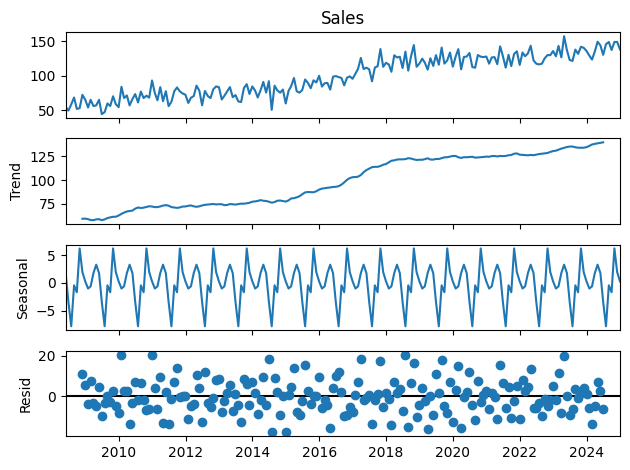

In [129]:
# Use seasonal decomposition to split the time series into trend, seasonal, and residual components

def ts_decompose(y, model="additive"):  # model => additive or multiplicative
    result = seasonal_decompose(y, model=model, period=12)  # period 설정은 데이터의 주기를 반영
    # 분해 결과를 시각화
    result.plot()
    plt.show()

# 시계열 분해 함수 호출 (additive 모델로 분해)
ts_decompose(sale_data['Sales'], model="additive")
# Plot the decomposed components


### 2.2 Build a DES Model
**Task:** Build a Double Exponential Smoothing (DES) model using the training data

DES MSE: 158.94438061506276, RMSE: 12.607314567942801


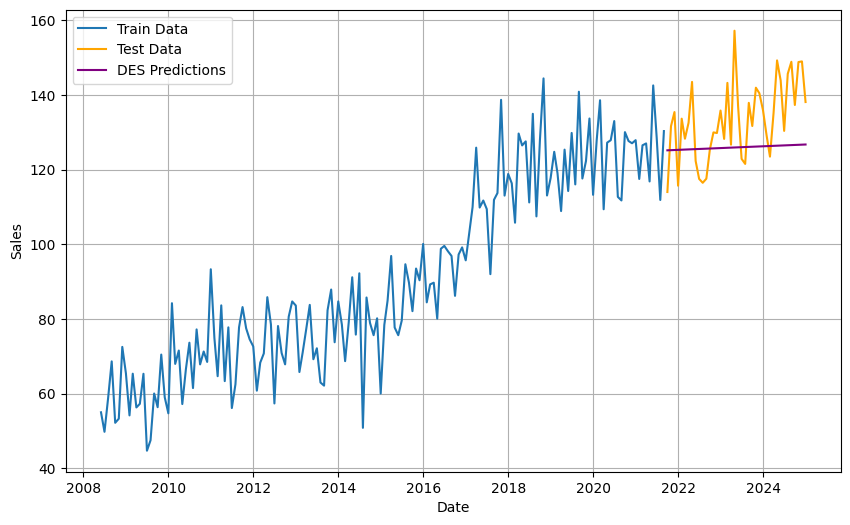

In [130]:
# Fit a DES model and make predictions on the test set
des_model = ExponentialSmoothing(train['Sales'], trend='add').fit()
y_pred = des_model.forecast(len(test))
# Compute error metrics (MSE, RMSE)
# MSE와 RMSE 계산
mse = np.mean((test['Sales'].values - y_pred) ** 2)
rmse = np.sqrt(mse)
# MSE와 RMSE 출력
print(f"DES MSE: {mse}, RMSE: {rmse}")

# Plot Graph of DES: Train, Test and Predictions
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data')
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, y_pred, label='DES Predictions', color='purple')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


### 2.3 Hyperparameter Tuning and Optimizer Function
**Task:** Optimize the DES model by tuning both the level (alpha) and trend (beta)

Best alpha: 0.66, Best beta: 0.81, Best MSE: 76.24241204299759


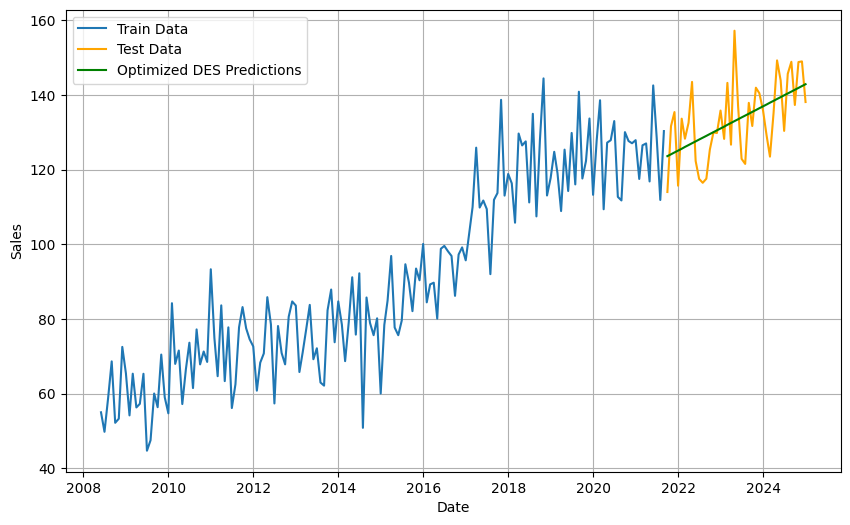

In [134]:
# Create a function to find the optimal alpha and beta by minimizing the MSE

# Use the optimizer to find the best values for alpha and beta
# Plot the train, test, and predicted values for the optimized alpha and beta


# 최적화된 DES 모델을 찾는 함수 (alpha, beta 최적화)
def des_optimizer(train, test, alphas, betas, step=len(test)):
    best_alpha, best_beta, best_mse = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train['Sales'], trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mse = np.mean((test['Sales'].values - y_pred) ** 2)
            if mse < best_mse:
                best_alpha, best_beta, best_mse = alpha, beta, mse
            #print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mse:", round(mse, 4))
    #print("Best alpha:", round(best_alpha, 2), "Best beta:", round(best_beta, 2), "Best MSE:", round(best_mse, 4))
    return best_alpha, best_beta, best_mse

# 가능한 alpha와 beta 값들
alphas = np.arange(0.01, 1.0, 0.05)
betas = np.arange(0.01, 1.0, 0.05)

# 최적의 alpha와 beta 값 찾기
best_alpha, best_beta, best_mse = des_optimizer(train, test, alphas, betas)

# 최적의 alpha와 beta로 모델 학습 및 예측
optimized_des_model = ExponentialSmoothing(train['Sales'], trend="add").fit(smoothing_level=best_alpha, smoothing_slope=best_beta)
optimized_predictions = optimized_des_model.forecast(len(test))

# 최적의 alpha, beta 및 MSE 출력
print(f"Best alpha: {best_alpha}, Best beta: {best_beta}, Best MSE: {best_mse}")

# 최적화된 DES 모델 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data')
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, optimized_predictions, label='Optimized DES Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## 3. Triple Exponential Smoothing (TES) - Holt-Winters

### 3.1 Build a TES Model
**Task:** Build a Triple Exponential Smoothing (TES) model using Holt-Winters method

TES MSE: 106.9507127566822, RMSE: 10.341697769548393


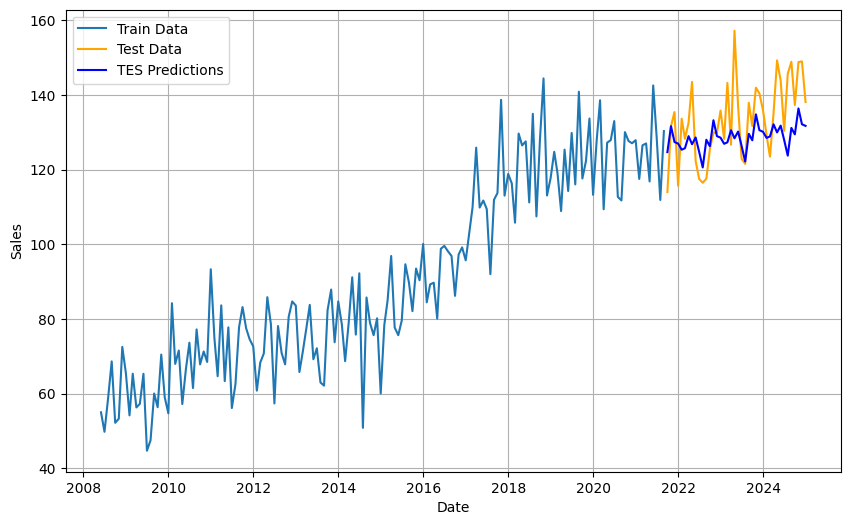

In [137]:
# Fit the TES model to the training data and make predictions on the test data
tes_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
y_pred = tes_model.forecast(len(test))
# Compute error metrics (MSE, RMSE)
# MSE와 RMSE 계산
mse = np.mean((test['Sales'].values - y_pred) ** 2)
rmse = np.sqrt(mse)

# Plot Graph of TES: Train, Test and Predictions


print(f"TES MSE: {mse}, RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data',)
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, y_pred, label='TES Predictions', color='b')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Hyperparameter Tuning and Optimizer Function
**Task:** Optimize the TES model by tuning alpha, beta, and gamma

Best alpha: 0.3566257538535849, Best beta: 0.10189329019503057, Best gamma: 0.050946643851731865, Best MSE: 72.540248358916


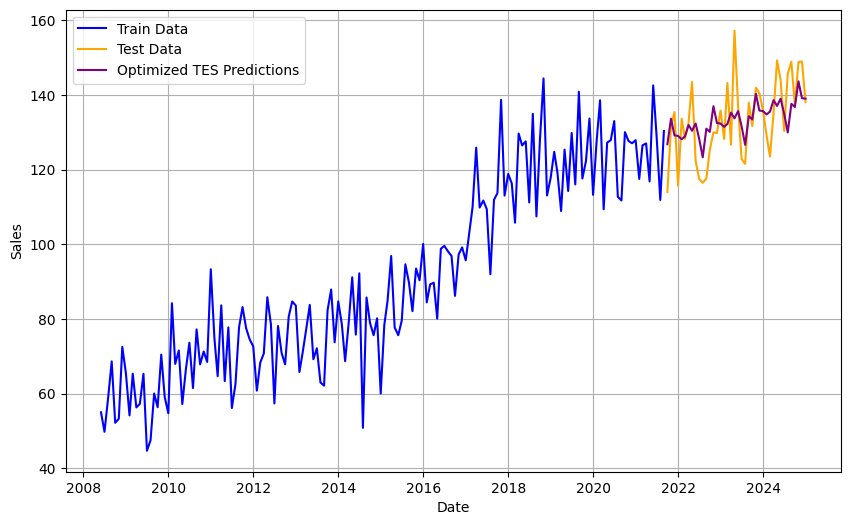

In [145]:
# Create a function to find the optimal alpha, beta, and gamma using an optimizer function

# Use the optimizer to find the best values for alpha, beta, and gamma

# Plot the train, test, and predicted values for the optimized alpha, beta, and gamma

# MSE 계산 함수
def mse_func(params, train, test):
    alpha, beta, gamma = params
    model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit(
        smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    predictions = model.forecast(len(test))
    mse = np.mean((test['Sales'].values - predictions) ** 2)
    return mse

# 최적화 함수 (alpha, beta, gamma 찾기)
def tes_optimizer(train, test):
    initial_guess = [0.7, 0.2, 0.1]  # 초기값
    bounds = [(0, 1), (0, 1), (0, 1)]  # alpha, beta, gamma의 범위
    result = minimize(mse_func, initial_guess, args=(train, test), bounds=bounds)
    best_alpha, best_beta, best_gamma = result.x
    best_mse = result.fun
    return best_alpha, best_beta, best_gamma, best_mse

# 최적의 alpha, beta, gamma 찾기
best_alpha, best_beta, best_gamma, best_mse = tes_optimizer(train, test)

# 최적화된 TES 모델 학습 및 예측
optimized_tes_model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit(
    smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)
optimized_predictions = optimized_tes_model.forecast(len(test))

# 최적의 alpha, beta, gamma 및 MSE 출력
print(f"Best alpha: {best_alpha}, Best beta: {best_beta}, Best gamma: {best_gamma}, Best MSE: {best_mse}")

# 최적화된 TES 모델 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train['Sales'], label='Train Data', color='blue')
plt.plot(test['Sales'], label='Test Data', color='orange')
plt.plot(test.index, optimized_predictions, label='Optimized TES Predictions', color='purple')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

